## Classification of images using convolutional neural network (CNN)

### The objective of this project:

The goal of this project is to build and train convolutional neural networks for classification of images in the CIFAR-10 Dataset. CIFAR-10 is composed of 60000 32x32 color images in 10 classes, with 6000 images per class, which is a well-known dataset for image classification. This dataset has 50000 training images and 10000 test images.

The 10 classes are:

0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

For details about CIFAR-10 see: https://www.cs.toronto.edu/~kriz/cifar.html

### An outline of the Deep Learning project plan:

1. Load the CIFAR-10 dataset and examine its data structure.
2. Engineer the dataset to create the train and test datasets, and scale them for CNN modeling.
3. Build the first CNN model and train it using the RMSprop optimizer. Assess the prediction accuracy of the trained CNN model.
4. Train the CNN model with the adam optimizer and assess the its prediction accuracy.
5. Build the second CNN model with a more complicated neural architecture and test its prediction performance.

In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

Using TensorFlow backend.


The CIFAR-10 dataset can be imported from the Keras library using the load_data() method. The loaded CIFAR-10 dataset contain two tuples, which are training and test sets. There are x and y values for each dataset.

In [2]:
# The CIFAR-10 dataset was loaded and split into train and test datasets. Their data structures were examined.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
50000 train samples
10000 test samples


In [3]:
## Examine the shape of each image. Each image is a 32 x 32 x 3 numpy
x_train[253].shape

(32, 32, 3)

The classification of the image:  [3]


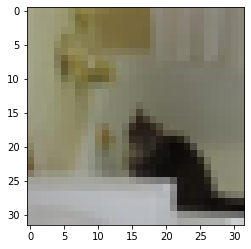

In [4]:
## Visualization of an image dataset.

print('The classification of the image: ', y_train[253])
plt.imshow(x_train[253]);

In [5]:
# Use keras.utils.to_categorical() to convert an integer between 0-9 to a vector with a 1 in the (Pythonic) 9th position
# This data conversion is required for training CNN models

num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Examine the converted dataset
y_train[253]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [7]:
# Convert the data type into float and scale the data values

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Build a CNN deep learning model:

#### Keras Layers for CNNs:

Neural Networks are primarily composed of the Dense, Activation and Dropout Layers. For building a CNN model, there are the CNN-specific layers provided by Keras. These CNN-specific layers are listed below. The Keras Sequential API is used to build neural layers of the CNN model.

#### Conv2D:

The convolutional (Conv2D) layer is the first one to add into CNN. It contains filters to transform the image data using the kernel filter matrix.

To execute the Conv2D function to build a CNN model, the following Keras function is used.

**keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, \**kwargs)**


**A few parameters explained:**

* filters: the number of filter used per location. In other words, the depth of the output.
* kernel_size: an (x,y) tuple giving the height and width of the kernel to be used
* strides: and (x,y) tuple giving the stride in each dimension. Default is (1,1)
* input_shape: required only for the first layer

Note: the size of the output will be determined by the kernel_size, strides


#### MaxPooling2D:

MaxPooling2D is the second important neural layer in CNN. It functions as a downsampling filter to extract more important feature data values for reducing the computational cost and overfitting. By combining both Conv2D and MaxPooling2D, CNN can integrate local features and identify the global features of the image.

**keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)**

* pool_size: the (x,y) size of the grid to be pooled.
* strides: Assumed to be the pool_size unless otherwise specified


#### Dropout:

Dropout is a method for the regularization of CNN. Setting Dropout in CNN can randomly ignore a proportion of neural nodes (adjusting their weights to zero) for each training step. Setting Dropout drives CNN to learn features in a distributed manner. The inclusion of this method in CNN improves generalization and minimizes the overfitting.


#### Flatten:

This layer is to turn the input into a one-dimensional vector (per instance). This layer is required when transitioning between convolutional layers and fully connected layers.

In [8]:
# Build the first CNN model using the Keras Sequential API

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_2 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

In [9]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 22s 430us/step - loss: 1.7329 - accuracy: 0.3673 - val_loss: 1.5380 - val_accuracy: 0.4570
Epoch 2/15
50000/50000 [==============================] - 21s 424us/step - loss: 1.4512 - accuracy: 0.4763 - val_loss: 1.3203 - val_accuracy: 0.5358
Epoch 3/15
50000/50000 [==============================] - 21s 411us/step - loss: 1.3444 - accuracy: 0.5218 - val_loss: 1.2338 - val_accuracy: 0.5560
Epoch 4/15
50000/50000 [==============================] - 21s 419us/step - loss: 1.2726 - accuracy: 0.5481 - val_loss: 1.1623 - val_accuracy: 0.5884
Epoch 5/15
50000/50000 [==============================] - 20s 392us/step - loss: 1.2212 - accuracy: 0.5662 - val_loss: 1.1993 - val_accuracy: 0.5733
Epoch 6/15
50000/50000 [==============================] - 24s 485us/step - loss: 1.1882 - accuracy: 0.5808 - val_loss: 1.0991 - val_accuracy: 0.6059
Epoch 7/15
50000/50000 [==============================] 

In [10]:
# The predictions of x_test from the CNN model are probabilities for classes
model_1.predict(x_test)

array([[1.32166566e-02, 9.79335629e-04, 1.42665163e-01, ...,
        2.66466420e-02, 1.62161347e-02, 1.89722108e-03],
       [9.58724245e-02, 4.11439687e-01, 3.97793974e-06, ...,
        1.28629525e-08, 4.89496440e-01, 3.18735279e-03],
       [1.52348578e-01, 2.55635902e-02, 1.32777197e-02, ...,
        4.14361758e-03, 7.69058287e-01, 1.63525622e-02],
       ...,
       [1.08572957e-03, 2.46698473e-05, 8.75498056e-02, ...,
        3.10110636e-02, 4.75588429e-04, 1.52245397e-04],
       [2.16618031e-02, 6.47548353e-03, 1.74624205e-01, ...,
        8.98089707e-02, 3.00113112e-04, 2.22325631e-04],
       [1.75226171e-06, 5.82319304e-09, 2.28551755e-04, ...,
        9.69778001e-01, 1.74387371e-09, 1.01512931e-07]], dtype=float32)

In [11]:
# Use predict_classes to identify which class has the highest probability for each prediction
model_1.predict_classes(x_test)

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [12]:
print(y_test.shape)
y_test

(10000, 10)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [13]:
import numpy as np
np.argmax(y_test, axis=1)

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [14]:
# The prediction accuracy of the first CNN model using the RMSprop optimizer
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(y_test, axis=1), model_1.predict_classes(x_test))

0.6412

### Train the CNN model using adam as the optimizer

In [15]:
# Train the first CNN model using the adam optimizer

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

batch_size = 32

# initiate adam optimizer
opt = keras.optimizers.adam(lr=0.0005)

# Train the model using the adam optimizer
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 22s 443us/step - loss: 1.6895 - accuracy: 0.3792 - val_loss: 1.4237 - val_accuracy: 0.4862
Epoch 2/15
50000/50000 [==============================] - 20s 397us/step - loss: 1.4299 - accuracy: 0.4789 - val_loss: 1.2836 - val_accuracy: 0.5360
Epoch 3/15
50000/50000 [==============================] - 20s 400us/step - loss: 1.3243 - accuracy: 0.5255 - val_loss: 1.2174 - val_accuracy: 0.5753
Epoch 4/15
50000/50000 [==============================] - 22s 445us/step - loss: 1.2577 - accuracy: 0.5513 - val_loss: 1.1790 - val_accuracy: 0.5858
Epoch 5/15
50000/50000 [==============================] - 20s 408us/step - loss: 1.2046 - accuracy: 0.5713 - val_loss: 1.1186 - val_accuracy: 0.6134
Epoch 6/15
50000/50000 [==============================] - 21s 428us/step - loss: 1.1609 - accuracy: 0.5863 - val_loss: 1.0684 - val_accuracy: 0.6245
Epoch 7/15
50000/50000 [==============================] 

In [16]:
# The prediction accuracy of the first CNN model using the adam optimizer
accuracy_score(np.argmax(y_test, axis=1), model_1.predict_classes(x_test))

0.6736

Based on accuracy score analysis, adam is better than RMSprop as the optimizer for training the CNN model for classification prediction.

### Build the second CNN model with a more complicated neural architecture:

Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Set kernel size as 3 X 3.
* Use strides of 1 for all convolutional layers.

In [17]:
# Build the second CNN model

model_2 = Sequential()

# Add the first Conv2D layer with 32 filters
model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

# Add the second Conv2D layer with 32 filters
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))

# Add the first MaxPooling2D layer
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# Add the third Conv2D layer with 64 filters
model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))

# Add the fourth Conv2D layer with 64 filters
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))

# Add the second MaxPooling2D layer
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# Add Flatten
model_2.add(Flatten())

# Add the Dense layer
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))

# Add the final output layer
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

# Check number of parameters
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

In [18]:
# initiate adam optimizer
opt_2 = keras.optimizers.adam(lr=0.0005)

# Train the second CNN model using adam
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt_2,
              metrics=['accuracy'])

model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 177s 4ms/step - loss: 1.5761 - accuracy: 0.4230 - val_loss: 1.2350 - val_accuracy: 0.5499
Epoch 2/5
50000/50000 [==============================] - 180s 4ms/step - loss: 1.1589 - accuracy: 0.5885 - val_loss: 0.9742 - val_accuracy: 0.6575
Epoch 3/5
50000/50000 [==============================] - 175s 3ms/step - loss: 0.9700 - accuracy: 0.6595 - val_loss: 0.8450 - val_accuracy: 0.7005
Epoch 4/5
50000/50000 [==============================] - 171s 3ms/step - loss: 0.8579 - accuracy: 0.7001 - val_loss: 0.8221 - val_accuracy: 0.7107
Epoch 5/5
50000/50000 [==============================] - 168s 3ms/step - loss: 0.7886 - accuracy: 0.7229 - val_loss: 0.7507 - val_accuracy: 0.7368


In [19]:
# The prediction accuracy of the second CNN model using the adam optimizer
accuracy_score(np.argmax(y_test, axis=1), model_2.predict_classes(x_test))

0.7368

### Conclusion:

This CNN project for image classification shows that the CNN model with a more complicated neural architecture has a better prediction performance when it is trained by the adam optimizer.